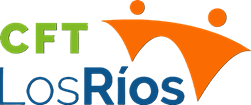
# Taller de Analítica
### Clase 2: Algoritmos de Clasifiación con GridSearchCV
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('iris.csv')

data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data.shape

(150, 5)

In [3]:
data.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
# Distribución de clases
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
# Preparación de datos para entrenamiento
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Árbol de Decisión para Clasificación

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define los parámetros 
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


dt = DecisionTreeClassifier(random_state=42)

# Inicializa GridSearchCV 
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_dt.fit(X_train_scaled, y_train)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros:", grid_search_dt.best_params_)

# Acceder al modelo
best_dt_model = grid_search_dt.best_estimator_
best_dt_model

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=42)

In [7]:
# predicciones
best_dt_model.predict(X_test)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define los parámetros 
param_grid_knn = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Inicializa el clasificador 
knn = KNeighborsClassifier()

# Inicializa GridSearchCV 
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_knn.fit(X_train_scaled, y_train)

# acceder al modelo
best_knn_model = grid_search_knn.best_estimator_
best_knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [9]:
# predicciones
best_knn_model.predict(X_test)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

### Naibe Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define los parámetros para GaussianNB
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Inicializa el clasificador
gnb = GaussianNB()

# Inicializa GridSearchCV
grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_nb.fit(X_train, y_train)  

# Acceder al mejor modelo
best_nb_model = grid_search_nb.best_estimator_
best_nb_model

GaussianNB()

In [11]:
# predicciones
best_nb_model.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

### Random Forest para Clasificación

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define los parámetros para RandomForestClassifier
param_grid_rf = {
    'n_estimators': [5, 10, 15],  # Número de árboles
    'max_depth': [5, 10, 15],        # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4]     # Mínimo número de muestras necesarias en una hoja
}

# Inicializa el clasificador
rf = RandomForestClassifier()

# Inicializa GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Acceder al mejor modelo
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=5, n_estimators=15)

In [13]:
# Predicciones
best_rf_model.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

### Support Vector Machine (SVM)

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define los parámetros para SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],            
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]  
}

# Inicializa el clasificador
svc = SVC()

# Inicializa GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_svc.fit(X_train_scaled, y_train)  # Importante escalar los datos para SVM

# Acceder al mejor modelo
best_svc_model = grid_search_svc.best_estimator_
best_svc_model

SVC(C=100, gamma=0.01)

In [15]:
# Predicciones
best_svc_model.predict(X_test_scaled)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

### Multilayer Perceptron

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define los parámetros para MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500]  # Incrementa max_iter
}

# Inicializa el clasificador
mlp = MLPClassifier()

# Inicializa GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_mlp.fit(X_train_scaled, y_train)

# Acceder al mejor modelo
best_mlp_model = grid_search_mlp.best_estimator_

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neural_netw

In [17]:
# Hacer predicciones
best_mlp_model.predict(X_test_scaled)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

### XGBoost

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Codificamos nuestras variables categóricas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Define los parámetros para XGBClassifier
param_grid_xgb = {
    'n_estimators': [5, 10, 20],  # Número de árboles
    'max_depth': [3, 5, 7],          # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2] # Tasa de aprendizaje
}

# Inicializa el clasificador con parámetros adicionales para evitar advertencias
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Inicializa GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_xgb.fit(X_train, y_train_encoded)

# Acceder al mejor modelo
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
# Predicciones
best_xgb_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

### Comparación de Métricas

* Sensibilidad: La sensibilidad mide la proporción de positivos reales que se identificaron correctamente. Es una medida de la capacidad del modelo para detectar todas las instancias positivas.
* Especificidad: La especificidad mide la proporción de negativos reales que se identificaron correctamente.
* Precisión: La precisión mide la proporción de predicciones positivas que fueron correctas.
* Medida F1: La medida F1 es la media armónica de la precisión y la sensibilidad. Combina ambas en una sola métrica al considerar tanto los falsos positivos como los falsos negativos.

### Matríz de Confusión

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tabulate import tabulate

def specificity_per_class(y_true, y_pred):
    # Obtener la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    specificity_scores = []
    for i in range(len(cm)):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity_scores.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return np.mean(specificity_scores)

# Asegúrate de que X_test y y_test están preparados adecuadamente
predictions = {
    'KNN': best_knn_model.predict(X_test),
    'Decision Tree': best_dt_model.predict(X_test),
    'Random Forest': best_rf_model.predict(X_test),
    'Naive Bayes': best_nb_model.predict(X_test),
    'SVM': best_svc_model.predict(X_test),
    'MLP': best_mlp_model.predict(X_test),
    # 'XGBoost': best_xgb_model.predict(X_test)
}

# Calculamos las métricas para cada modelo
metrics_summary = []

for name, preds in predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='macro', zero_division=1)
    recall = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    specificity = specificity_per_class(y_test, preds)
    
    metrics_summary.append([name, accuracy, precision, recall, specificity, f1])

# Creamos una tabla con tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
print(tabulate(metrics_summary, headers=headers, tablefmt='grid'))


+---------------+------------+-------------+----------+---------------+------------+
| Model         |   Accuracy |   Precision |   Recall |   Specificity |   F1 Score |
+===============+============+=============+==========+===============+============+
| KNN           |   0.366667 |    0.788889 | 0.333333 |      0.666667 |   0.178862 |
+---------------+------------+-------------+----------+---------------+------------+
| Decision Tree |   0.366667 |    0.788889 | 0.333333 |      0.666667 |   0.178862 |
+---------------+------------+-------------+----------+---------------+------------+
| Random Forest |   1        |    1        | 1        |      1        |   1        |
+---------------+------------+-------------+----------+---------------+------------+
| Naive Bayes   |   1        |    1        | 1        |      1        |   1        |
+---------------+------------+-------------+----------+---------------+------------+
| SVM           |   0.366667 |    0.516667 | 0.333333 |      0.68

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


### Realizar la matríz de confusión de los modelos